In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Load dataset

In [30]:
df = pd.read_csv("Indian_Kids_Screen_Time.csv")

In [31]:
df

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban
...,...,...,...,...,...,...,...,...
9707,17,Male,3.26,Smartphone,True,0.44,Poor Sleep,Urban
9708,17,Female,4.43,Smartphone,True,0.40,Poor Sleep,Rural
9709,16,Male,5.62,Smartphone,True,0.39,"Poor Sleep, Eye Strain, Anxiety",Rural
9710,17,Male,5.60,TV,True,0.43,Poor Sleep,Urban


Basic overview

In [32]:
df.shape
df.info()
df.describe()


<class 'pandas.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   str    
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   str    
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   str    
 7   Urban_or_Rural                     9712 non-null   str    
dtypes: bool(1), float64(2), int64(1), str(4)
memory usage: 804.7 KB


,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio
count,9712.000000,9712.000000,9712.000000
mean,12.979201,4.352837,0.427226
std,3.162437,1.718232,0.073221
min,8.000000,0.000000,0.300000
25%,10.000000,3.410000,0.370000
50%,13.000000,4.440000,0.430000
75%,16.000000,5.380000,0.480000
max,18.000000,13.890000,0.600000


Check/handle missing,null values

In [35]:
df.isnull().sum()
df['Health_Impacts'].fillna("None", inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_1628\643438646.py:2: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df['Health_Impacts'].fillna("None", inplace=True)


0                Poor Sleep, Eye Strain
1                            Poor Sleep
2                            Poor Sleep
3                                  None
4                   Poor Sleep, Anxiety
                     ...               
9707                         Poor Sleep
9708                         Poor Sleep
9709    Poor Sleep, Eye Strain, Anxiety
9710                         Poor Sleep
9711                            Anxiety
Name: Health_Impacts, Length: 9712, dtype: str

Create Age Groups

In [36]:
bins = [0, 6, 10, 14, 18]
labels = ['0-6', '7-10', '11-14', '15-18']

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)


In [37]:
df[['Age', 'Age_Group']].head()


,Age,Age_Group
0,14,11-14
1,11,11-14
2,18,15-18
3,15,15-18
4,12,11-14


EDA Visualizations

1. Screen time distribution

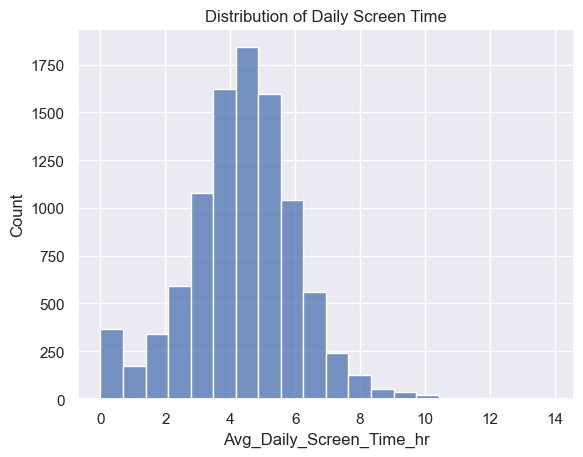

In [38]:
sns.histplot(df['Avg_Daily_Screen_Time_hr'], bins=20)
plt.title("Distribution of Daily Screen Time")
plt.show()


2. Screen time by gender

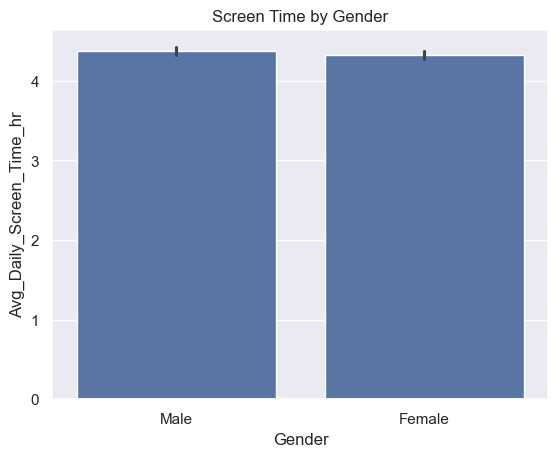

In [39]:
sns.barplot(x='Gender', y='Avg_Daily_Screen_Time_hr', data=df)
plt.title("Screen Time by Gender")
plt.show()


3.Device usage

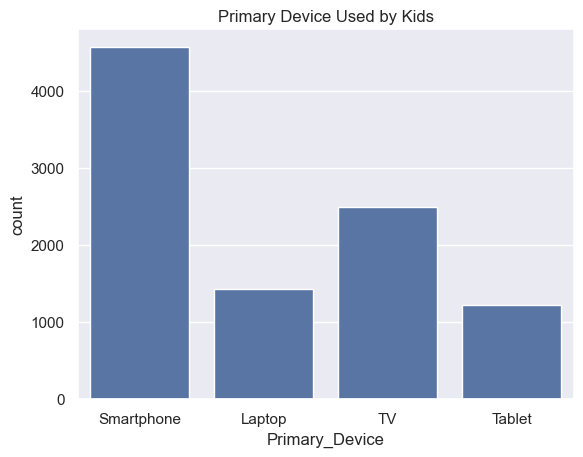

In [40]:
sns.countplot(x='Primary_Device', data=df)
plt.title("Primary Device Used by Kids")
plt.show()


4.Screen time by age group

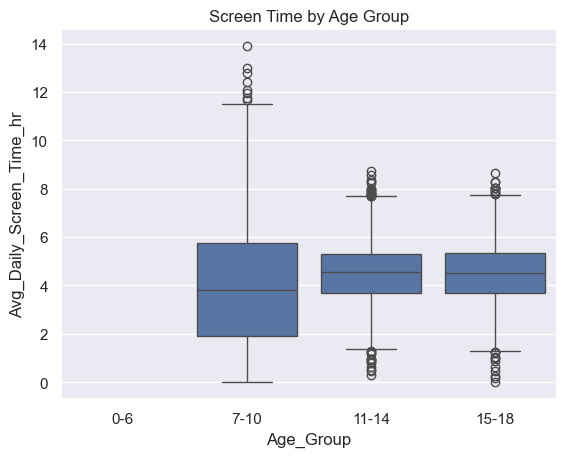

In [44]:
sns.boxplot(x='Age_Group', y='Avg_Daily_Screen_Time_hr', data=df)
plt.title("Screen Time by Age Group")
plt.show()


5. Urban vs Rural screen time

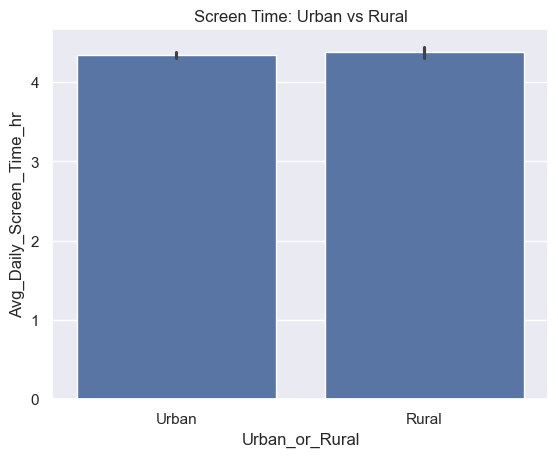

In [41]:
sns.barplot(x='Urban_or_Rural', y='Avg_Daily_Screen_Time_hr', data=df)
plt.title("Screen Time: Urban vs Rural")
plt.show()


6. Exceeded recommended limit

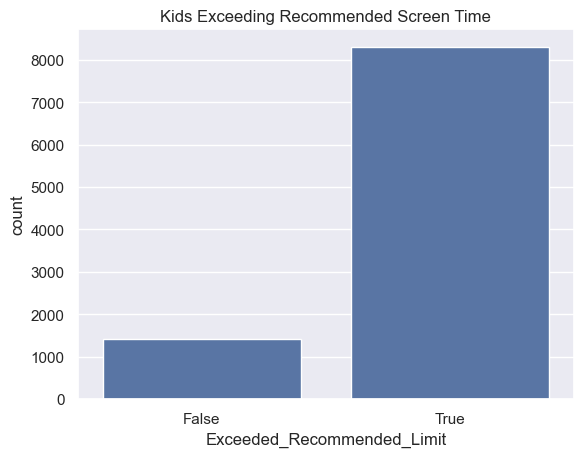

In [42]:
sns.countplot(x='Exceeded_Recommended_Limit', data=df)
plt.title("Kids Exceeding Recommended Screen Time")
plt.show()


7. Correlation heatmap

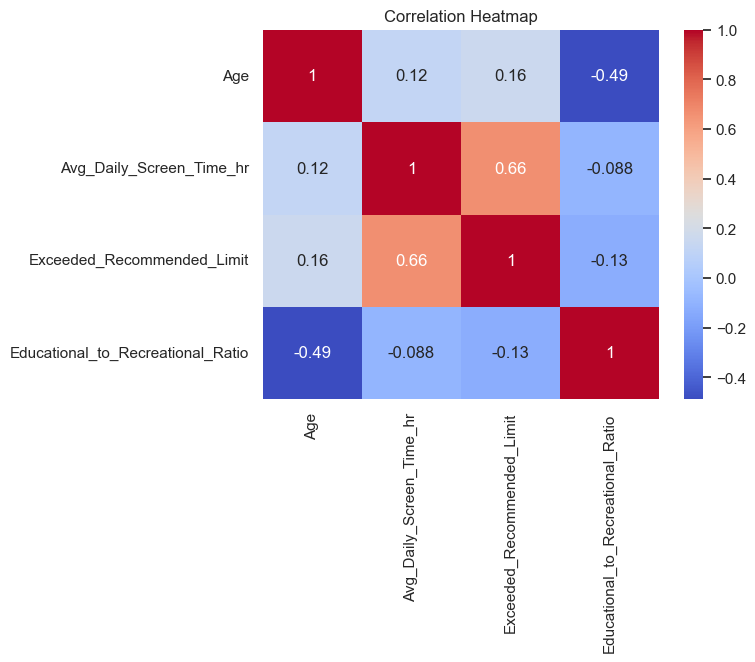

In [43]:
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
